# Mining claims in Quebec

**Step 1**: Download data from GESTIM
* Go to [gestim.mines.gouv.qc.ca](https://gestim.mines.gouv.qc.ca/)
* Click "S'inscrire" and create an account
* Sign in, click Consultation du registre > Recherche
* Select "Date d'inscription - Entre __ et ___" and input a date range, click "Recherche"
* Select "Liste de titres excluant la localisation" and click "Telecharger"
* Download the file, go back to "Recherche" and repeat

**Step 2**: Extract CSV files from each zip: open a terminal in the directory containing the zip files and run:

`unzip '*.zip'`

**Step 3:** Combine files into one CSV using pandas:

In [ ]:
import os
import glob
import pandas as pd

file_path = '/path/to/your/directory'
all_files = glob.glob(file_path+'/*.csv')
df = pd.concat((pd.read_csv(f, 
                            encoding='UTF-16', 
                            sep='\t',
                            on_bad_lines='warn') for f in all_files))

**Or**: Load the pre-processed mining claims data

In [1]:
import pandas as pd
df = pd.read_csv('data/mining-claims-2019-2024.csv')

/var/folders/wg/s1f24q713mb0h5lcj__zsrh1jz45r8/T/ipykernel_77105/3924893663.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/mining-claims-2019-2024.csv')


**Step 4**: Create a datetime column and use it to extract month and year


In [2]:
df['IssueDate'] = pd.to_datetime(df["Date d'inscription"])

df['Month'] = df['IssueDate'].dt.month
df['Year'] = df['IssueDate'].dt.year


**Step 5:** Make new dataframe grouped by year and month, counting the number of unique claim title numbers (column `No titre`)

In [3]:
monthcount = df.groupby(['Year','Month'])['No titre'].count().reset_index()

monthcount.columns = ['Year','Month', 'Count']

In [4]:
monthcount.to_csv('data/claims-per-month-2019-2024.csv',index=False)

**Step 6:** Calculate averages

In [5]:
mean1 = monthcount.query('Year <= 2021')['Count'].mean()
print(f'Average number of claims 2019-2021: {mean1}')

mean2 = monthcount.query('Year >= 2022')['Count'].mean()
print(f'Average number of claims 2022-2024: {mean2}')

Average number of claims 2019-2021: 3019.222222222222
Average number of claims 2022-2024: 7474.2692307692305


**Step 7:** Plot

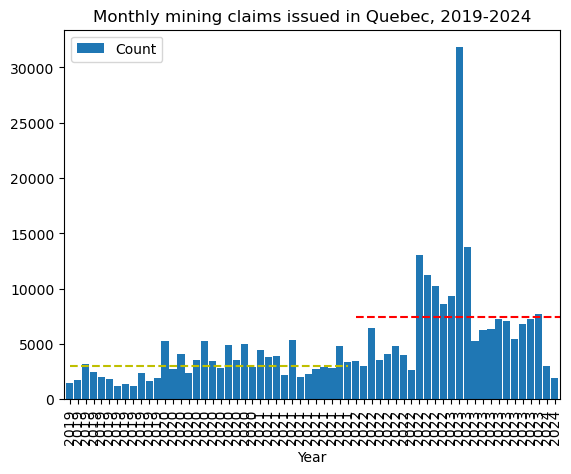

In [6]:
ax = monthcount.plot(x='Year', y='Count', 
                     kind='bar', 
                     width=.9,
                     title="Monthly mining claims issued in Quebec, 2019-2024")

ax.hlines(mean1, xmin=0, xmax=35, linestyles='--', colors='y')
ax.hlines(mean2, xmin=36, xmax=62, linestyles='--', colors='r')